In [1]:
import dependency_installer
import xarray as xr
from data_hunter_era5 import DataRetriver
import matplotlib.pyplot as plt


%matplotlib inline
# dependency_installer.main()

/Users/vardanmelkonyan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Explained Variance Ratio: [0.4864879  0.31171843 0.12524253 0.07655116]
Cumulative Explained Variance: [0.4864879  0.7982063  0.92344886 1.        ]


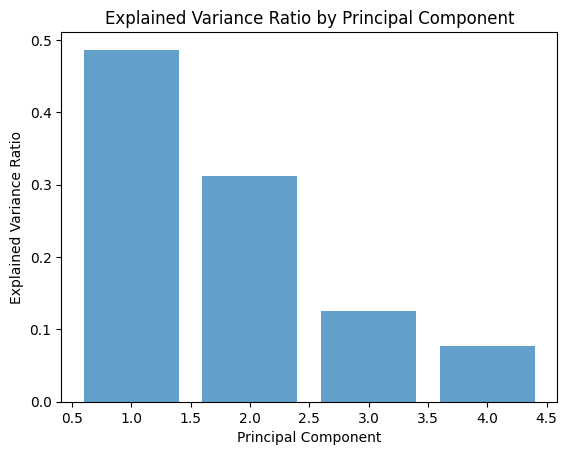

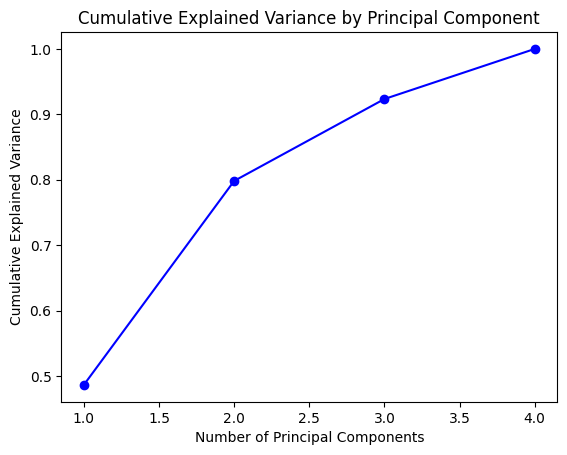

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

# Assuming 'global_observed_data[0]' is your dataset
# Extract the data for PCA

longitude_value = 179.75
latitude_value = -89.75

# global observed data

pca_observed_Data = DataRetriver.retrive_custom_data(
    startDate='2019-11-25',
    endDate='2019-11-28',
    properties= ['10m_u_component_of_wind', '10m_v_component_of_wind','2m_temperature','surface_pressure', 'soil_temperature_level_1'],
    long_min = 43, 
    long_max = 46, 
    lat_min= 38.5,
    lat_max= 41, )

# print(pca_observed_Data)


data_for_pca = xr.merge(pca_observed_Data).to_dataframe()

# Select relevant variables for PCA (adjust these based on your specific data)
data_for_pca['wind_speed'] = np.sqrt(data_for_pca['u10']**2 + data_for_pca['v10']**2)

selected_variables = ['t2m', 'sp', 'wind_speed', 'stl1']
data_for_pca = data_for_pca[selected_variables]


# Standardize the data (optional but recommended for PCA)
standardized_data = (data_for_pca - data_for_pca.mean()) / data_for_pca.std()

# Initialize PCA with the number of components you want to retain
n_components = len(data_for_pca.columns)  # Adjust the number of components based on your requirements
pca = PCA(n_components=n_components)

# Fit and transform the data
pca_result = pca.fit_transform(standardized_data)

# Create a DataFrame to store the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

# Add the time index back to the PCA DataFrame
pca_df['time'] = data_for_pca.index

# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained Variance Ratio:', explained_variance_ratio)

# Visualize the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print('Cumulative Explained Variance:', cumulative_explained_variance)

import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Plot the cumulative explained variance
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance by Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()